In [1637]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np




Read in first data set.

In [1638]:
df1 = pd.read_csv('KYRC24_OVW_Teacher_Working_Conditions.csv')

df1.head()

,School Year,County Number,County Name,District Number,District Name,School Number,School Name,School Code,State School Id,NCES ID,CO-OP,CO-OP Code,School Type,Impact Measure,Impact Value
0,20232024,NaN,NaN,999,All Districts,NaN,All Schools,999000,NaN,NaN,909,NaN,NaN,Managing Student Behavior,67
1,20232024,NaN,NaN,999,All Districts,NaN,All Schools,999000,NaN,NaN,909,NaN,NaN,School Climate,65
2,20232024,NaN,NaN,999,All Districts,NaN,All Schools,999000,NaN,NaN,909,NaN,NaN,School Leadership,69
3,20232024,1.0,ADAIR,1,Adair County,NaN,All Schools,1000,NaN,NaN,902,GRREC,NaN,Managing Student Behavior,55
4,20232024,1.0,ADAIR,1,Adair County,NaN,All Schools,1000,NaN,NaN,902,GRREC,NaN,School Climate,45


In [1639]:
Working_Conditions_df = df1
Working_Conditions_df.columns


Index(['School Year', 'County Number', 'County Name', 'District Number',
       'District Name', 'School Number', 'School Name', 'School Code',
       'State School Id', 'NCES ID', 'CO-OP', 'CO-OP Code', 'School Type',
       'Impact Measure', 'Impact Value'],
      dtype='object')

Dropped unnecessary columns.

In [1640]:
df_dropped_columns_Working_Conditions = Working_Conditions_df.drop(columns = ['County Number', 'County Name', 'School Number', 'School Code', 'School Type', 'CO-OP','CO-OP Code','NCES ID','State School Id', 'School Number', 'School Type', 'School Year'])

Created function to clean column titles.

In [1641]:
def clean_column_titles(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df


In [1642]:
df_dropped_columns_Working_Conditions = clean_column_titles(df_dropped_columns_Working_Conditions)
df_dropped_columns_Working_Conditions.head(20)

,district_number,district_name,school_name,impact_measure,impact_value
0,999,All Districts,All Schools,Managing Student Behavior,67
1,999,All Districts,All Schools,School Climate,65
2,999,All Districts,All Schools,School Leadership,69
3,1,Adair County,All Schools,Managing Student Behavior,55
4,1,Adair County,All Schools,School Climate,45
5,1,Adair County,All Schools,School Leadership,53
6,1,Adair County,Adair County High School,Managing Student Behavior,67
7,1,Adair County,Adair County High School,School Climate,45
8,1,Adair County,Adair County High School,School Leadership,55
9,1,Adair County,Adair County Middle School,Managing Student Behavior,46


Averaged the 3 impact measures to create a new column of the average impact value per district. 

In [1643]:
df_district_average_satisfaction = df_dropped_columns_Working_Conditions.groupby(["district_number", "district_name"])["impact_value"].mean().reset_index()
df_district_average_satisfaction = df_district_average_satisfaction.rename(columns = {"impact_value": "average_impact_value"})
df_district_average_satisfaction["average_impact_value"] = df_district_average_satisfaction["average_impact_value"].round(2)
df_district_average_satisfaction['district_number'] = df_district_average_satisfaction['district_number'].astype(str).str.strip()
df_district_average_satisfaction.head()


,district_number,district_name,average_impact_value
0,1,Adair County,51.40
1,5,Allen County,45.60
2,6,Anchorage Independent,76.00
3,11,Anderson County,50.95
4,12,Ashland Independent,66.59


Created 2 functions to be able to sort the top 10 or bottom 10 districts based on any column.


In [1644]:
def top10_districts(df, column, top_n=10, ascending=False):
    return df.sort_values(by=column, ascending=ascending).head(top_n)

In [1645]:
def bottom10_districts(df, column, bottom_n=10, ascending=True):
    return df.sort_values(by=column, ascending=ascending).head(bottom_n)

Used top10 function to rank districts by their average impact value.

In [1646]:
top10 = top10_districts(df_district_average_satisfaction, 'average_impact_value')
top10.head(10)

,district_number,district_name,average_impact_value
77,246,Hazard Independent,91.58
117,431,Monroe County,85.27
94,325,Leslie County,84.33
83,272,Jackson Independent,83.67
87,285,Johnson County,83.52
165,595,Wolfe County,83.50
170,777,Kentucky Tech System,81.87
46,146,Dawson Springs Independent,81.11
5,13,Augusta Independent,81.00
49,151,Edmonson County,80.78


Used bottom10 function to see the lowest districts based on average impact value.

In [1647]:
bottom10 = bottom10_districts(df_district_average_satisfaction, 'average_impact_value')
bottom10.head(10)

,district_number,district_name,average_impact_value
39,132,Cloverport Independent,45.33
1,5,Allen County,45.60
38,131,Clinton County,46.50
168,603,Kentucky School for the Deaf District,47.00
115,425,Metcalfe County,48.67
145,523,Russellville Independent,48.75
113,415,Menifee County,49.56
34,113,Caverna Independent,49.58
123,452,Newport Independent,49.92
3,11,Anderson County,50.95


Combined top10 and bottom10 to be able to compare to turnover percent later.

In [1648]:
df_combined_topbottom = pd.concat([top10, bottom10], ignore_index=True)
df_combined_topbottom['district_number'] = df_combined_topbottom['district_number'].astype(str).str.strip()
df_combined_topbottom.head(20)

,district_number,district_name,average_impact_value
0,246,Hazard Independent,91.58
1,431,Monroe County,85.27
2,325,Leslie County,84.33
3,272,Jackson Independent,83.67
4,285,Johnson County,83.52
5,595,Wolfe County,83.50
6,777,Kentucky Tech System,81.87
7,146,Dawson Springs Independent,81.11
8,13,Augusta Independent,81.00
9,151,Edmonson County,80.78


Read in second data set.


In [1649]:
df_Teacher_Turnover = pd.read_csv('KYRC24_OVW_Teacher_Turnover (1).csv')

df_Teacher_Turnover.head()

,School Year,County Number,County Name,District Number,District Name,School Number,School Name,School Code,State School Id,NCES ID,CO-OP,CO-OP Code,School Type,Teacher Count,Teacher Turnover Count,Turnover Percent
0,20232024,NaN,NaN,999,All Districts,NaN,All Schools,999000,NaN,NaN,909,NaN,NaN,"49,691","11,204",22.5
1,20232024,1.0,ADAIR,1,Adair County,NaN,All Schools,1000,NaN,NaN,902,GRREC,NaN,203,39,19.2
2,20232024,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,902,GRREC,A1,61,11,18.0
3,20232024,1.0,ADAIR,1,Adair County,12.0,Adair Learning Academy,1012,1001012.0,2.100030e+11,902,GRREC,A6,5,1,20.0
4,20232024,1.0,ADAIR,1,Adair County,14.0,Adair County Middle School,1014,1001014.0,2.100030e+11,902,GRREC,A1,49,15,30.6


Dropped unnecessary columns.

In [1650]:
df_dropped_columns_Teacher_Turnover = df_Teacher_Turnover.drop(columns = ['County Number', 'County Name', 'School Number', 'School Code', 'School Type', 'CO-OP','CO-OP Code','NCES ID','State School Id', 'School Number', 'School Type', 'Teacher Count', 'Teacher Turnover Count', 'School Year'])

Cleaned column titles and made district_number a string. 

In [1651]:
df_dropped_columns_Teacher_Turnover = clean_column_titles(df_dropped_columns_Teacher_Turnover)
df_dropped_columns_Teacher_Turnover['district_number'] = df_dropped_columns_Teacher_Turnover['district_number'].astype(str).str.strip()
df_dropped_columns_Teacher_Turnover.head(20)

,district_number,district_name,school_name,turnover_percent
0,999,All Districts,All Schools,22.5
1,1,Adair County,All Schools,19.2
2,1,Adair County,Adair County High School,18.0
3,1,Adair County,Adair Learning Academy,20.0
4,1,Adair County,Adair County Middle School,30.6
5,1,Adair County,Adair County Elementary School,9.8
6,1,Adair County,Adair County Primary Center,17.0
7,5,Allen County,All Schools,19.9
8,5,Allen County,Allen County Primary Center,20.0
9,5,Allen County,James E Bazzell Middle School,20.0


Read in 3rd data set.

In [1652]:
df_Teacher_Salary = pd.read_excel('Average Certified Salaries.xlsx', header=3)

df_Teacher_Salary.head()

,Dist No,District name,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,...,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Unnamed: 38
0,001,ADAIR,26903.0,29085.0,31536.0,31640.0,31634.0,32588.0,32972.0,33859.0,...,51190.22,54726.26,54978.07,54481.47,54090.31,53652.29,56888.81,56572.35,57723.48,NaN
1,005,ALLEN,26926.0,29315.0,30809.0,31355.0,32344.0,33137.0,33687.0,34422.0,...,53863.30,54071.84,53996.34,54487.56,55418.62,56169.73,56781.01,58546.96,61592.45,NaN
2,006,ANCHORAGE,30793.0,34532.0,36566.0,38496.0,38665.0,39352.0,40094.0,40511.0,...,66764.40,68302.38,73263.59,74204.17,73689.69,77412.97,79360.09,81282.49,80552.72,NaN
3,011,ANDERSON,26356.0,29228.0,31099.0,31754.0,32557.0,33399.0,34195.0,34866.0,...,52038.38,52445.24,52836.96,53468.63,54475.21,54921.52,56190.34,58451.95,60949.58,NaN
4,012,ASHLAND,28958.0,32152.0,33479.0,33912.0,34668.0,35342.0,35269.0,36269.0,...,54292.70,52837.71,52725.30,53676.87,53874.7,54513.83,54677.38,56241.45,58529.93,NaN


In [1653]:
df_Teacher_Salary.columns

Index(['Dist No', 'District name', '1989-90', '1990-91', '1991-92', '1992-93',
       '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', 'Unnamed: 38'],
      dtype='object')

Simplified df to only include the average salary for the 2023-2024 school year, cleaned column titles, ensured dist_no was a string.

In [1654]:
df_selected_Teacher_Salary = df_Teacher_Salary[["Dist No", "District name", "2023-24"]]
df_selected_Teacher_Salary = df_selected_Teacher_Salary.rename(columns={"2023-24": "Average Salary 23-24"})
df_selected_Teacher_Salary = clean_column_titles(df_selected_Teacher_Salary)
df_selected_Teacher_Salary['dist_no'] = df_selected_Teacher_Salary['dist_no'].astype(str).str.strip()
df_selected_Teacher_Salary.head(10)

,dist_no,district_name,average_salary_23-24
0,001,ADAIR,56572.35
1,005,ALLEN,58546.96
2,006,ANCHORAGE,81282.49
3,011,ANDERSON,58451.95
4,012,ASHLAND,56241.45
5,013,AUGUSTA,55779.79
6,015,BALLARD,57308.89
7,016,BARBOURVILLE,55957.51
8,017,BARDSTOWN,69103.89
9,021,BARREN,61690.39


Looked at top10 and bottom10 districts for average salary.

In [1655]:
top10_districts(df_selected_Teacher_Salary, 'average_salary_23-24')

,dist_no,district_name,average_salary_23-24
2,006,ANCHORAGE,81282.49
86,275,JEFFERSON,79020.21
56,165,FAYETTE,75735.12
59,176,FT THOMAS,72662.72
8,017,BARDSTOWN,69103.89
140,492,PIKEVILLE,68340.50
103,354,LUDLOW,66556.19
15,035,BOONE,66526.38
90,291,KENTON,66243.62
23,071,BULLITT,65462.26


In [1656]:
bottom10_districts(df_selected_Teacher_Salary, 'average_salary_23-24')

,dist_no,district_name,average_salary_23-24
172,592,WILLIAMSBURG,50744.22
39,132,CLOVERPORT,50823.64
51,155,ELLIOTT,51092.88
151,523,RUSSELLVILLE,52722.92
52,156,EMINENCE,53070.07
95,315,LAWRENCE,53074.18
67,201,GRANT,53209.63
161,551,TODD,53237.80
62,185,FULTON,53242.71
35,115,CHRISTIAN,53351.72


Created sql connection and put dataframes into the database.


In [1657]:
conn = sqlite3.connect("my_database.db")

df_selected_Teacher_Salary.to_sql("salary", conn, if_exists="replace", index=False)
df_dropped_columns_Teacher_Turnover.to_sql("turnover", conn, if_exists="replace", index=False)
df_dropped_columns_Working_Conditions.to_sql("conditions", conn, if_exists="replace", index=False)
df_district_average_satisfaction.to_sql("average_satisfaction", conn, if_exists="replace", index=False)
df_combined_topbottom.to_sql("combined", conn, if_exists="replace", index=False)


20

Combined salary with turnover percent and created scatter plot using matplotlib.


In [1658]:
query = """
SELECT 
    s.*,
    t.turnover_percent
FROM salary s
JOIN turnover t
    ON CAST (s.dist_no AS TEXT) = CAST(t.district_number AS TEXT)
WHERE LOWER(t.school_name) = 'all schools'
"""
result_turnover_salary = pd.read_sql_query(query, conn)
result_turnover_salary.head(10)

,dist_no,district_name,average_salary_23-24,turnover_percent
0,101,CARROLL,61747.49,36.7
1,105,CARTER,57834.14,16.8
2,111,CASEY,55405.28,14.8
3,113,CAVERNA,60412.10,34.7
4,115,CHRISTIAN,53351.72,32.4
5,121,CLARK,57213.30,30.1
6,125,CLAY,55436.83,14.5
7,131,CLINTON,54423.98,8.8
8,132,CLOVERPORT,50823.64,29.0
9,133,RBIN,61271.17,17.2


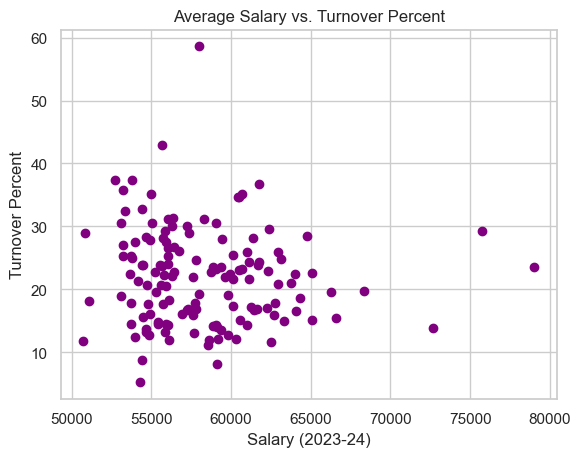

In [1659]:
plt.figure
plt.scatter(result_turnover['average_salary_23-24'], result_turnover['turnover_percent'], color='purple')
plt.title('Average Salary vs. Turnover Percent')
plt.xlabel('Salary (2023-24)')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined managing student behavior with turnover percent and created scatter plot.

In [1660]:
query = """
SELECT
    t.district_number,
    t.district_name,
    t.turnover_percent,
    c.impact_value,
    c.school_name, 
    c.impact_measure
FROM turnover t
JOIN conditions c
    ON t.district_number = c.district_number
WHERE t.school_name = 'All Schools' and c.school_name = 'All Schools'
    AND c.impact_measure = 'Managing Student Behavior'
"""

result_turnover_behavior = pd.read_sql_query(query, conn)
result_turnover_behavior.head(10)

,district_number,district_name,turnover_percent,impact_value,school_name,impact_measure
0,999,All Districts,22.5,67,All Schools,Managing Student Behavior
1,1,Adair County,19.2,55,All Schools,Managing Student Behavior
2,5,Allen County,19.9,46,All Schools,Managing Student Behavior
3,6,Anchorage Independent,5.4,82,All Schools,Managing Student Behavior
4,11,Anderson County,22.1,52,All Schools,Managing Student Behavior
5,12,Ashland Independent,31.7,64,All Schools,Managing Student Behavior
6,13,Augusta Independent,20.8,78,All Schools,Managing Student Behavior
7,15,Ballard County,15.9,70,All Schools,Managing Student Behavior
8,16,Barbourville Independent,6.4,75,All Schools,Managing Student Behavior
9,17,Bardstown Independent,21.7,67,All Schools,Managing Student Behavior


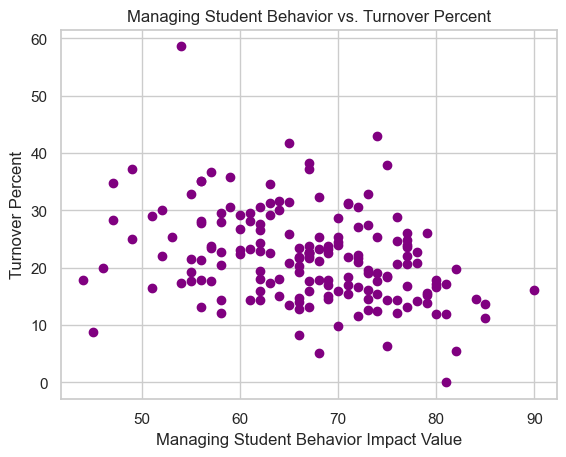

In [1661]:
plt.scatter(result_turnover_behavior['impact_value'], result_turnover_behavior['turnover_percent'], color='purple')
plt.title('Managing Student Behavior vs. Turnover Percent')
plt.xlabel('Managing Student Behavior Impact Value')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined school leadership with turnover percent and created scatter plot.

In [1662]:
query = """
SELECT
    t.district_number,
    t.district_name,
    t.turnover_percent,
    c.impact_value,
    c.school_name, 
    c.impact_measure
FROM turnover t
JOIN conditions c
    ON t.district_number = c.district_number
WHERE t.school_name = 'All Schools' and c.school_name = 'All Schools'
    AND c.impact_measure = 'School Leadership'
"""
result_turnover_leadership = pd.read_sql_query(query, conn)
result_turnover_leadership.head(10)

,district_number,district_name,turnover_percent,impact_value,school_name,impact_measure
0,999,All Districts,22.5,69,All Schools,School Leadership
1,1,Adair County,19.2,53,All Schools,School Leadership
2,5,Allen County,19.9,49,All Schools,School Leadership
3,6,Anchorage Independent,5.4,70,All Schools,School Leadership
4,11,Anderson County,22.1,51,All Schools,School Leadership
5,12,Ashland Independent,31.7,68,All Schools,School Leadership
6,13,Augusta Independent,20.8,85,All Schools,School Leadership
7,15,Ballard County,15.9,69,All Schools,School Leadership
8,16,Barbourville Independent,6.4,76,All Schools,School Leadership
9,17,Bardstown Independent,21.7,67,All Schools,School Leadership


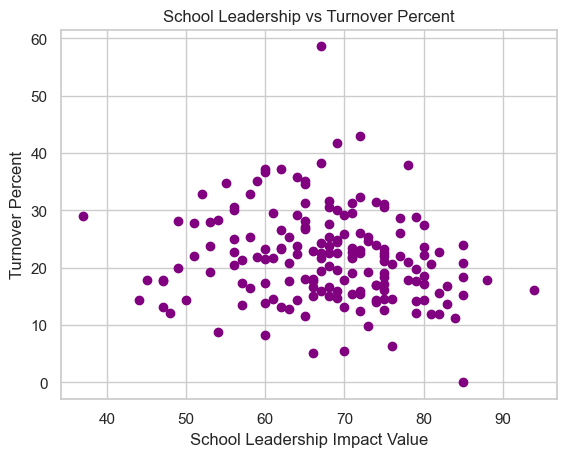

In [1663]:
plt.scatter(result_turnover_leadership['impact_value'], result_turnover_leadership['turnover_percent'], color='purple')
plt.title('School Leadership vs Turnover Percent')
plt.xlabel('School Leadership Impact Value')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined school climate with turnover percent and created scatter plot.

In [1664]:
query = """
SELECT
    t.district_number,
    t.district_name,
    t.turnover_percent,
    c.impact_value,
    c.school_name, 
    c.impact_measure
FROM turnover t
JOIN conditions c
    ON t.district_number = c.district_number
WHERE t.school_name = 'All Schools' and c.school_name = 'All Schools'
    AND c.impact_measure = 'School Climate'
"""
result_turnover_climate = pd.read_sql_query(query, conn)
result_turnover_climate.head(10)

,district_number,district_name,turnover_percent,impact_value,school_name,impact_measure
0,999,All Districts,22.5,65,All Schools,School Climate
1,1,Adair County,19.2,45,All Schools,School Climate
2,5,Allen County,19.9,41,All Schools,School Climate
3,6,Anchorage Independent,5.4,76,All Schools,School Climate
4,11,Anderson County,22.1,49,All Schools,School Climate
5,12,Ashland Independent,31.7,66,All Schools,School Climate
6,13,Augusta Independent,20.8,80,All Schools,School Climate
7,15,Ballard County,15.9,68,All Schools,School Climate
8,16,Barbourville Independent,6.4,81,All Schools,School Climate
9,17,Bardstown Independent,21.7,65,All Schools,School Climate


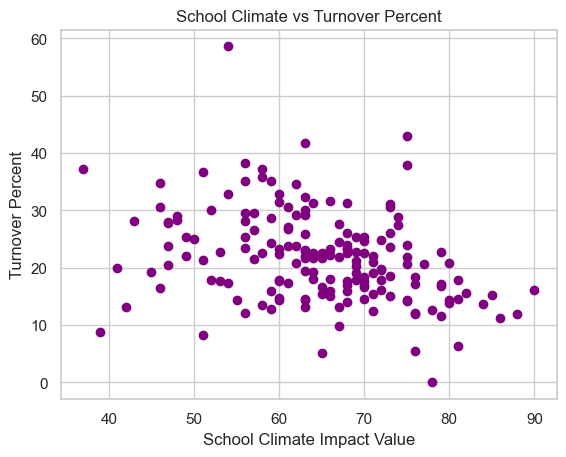

In [1665]:
plt.scatter(result_turnover_climate['impact_value'], result_turnover_climate['turnover_percent'], color='purple')
plt.title('School Climate vs Turnover Percent')
plt.xlabel('School Climate Impact Value')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined turnover percent with average impact value and created scatter plot.

In [1666]:
query = """
SELECT 
    a.*,
    t."turnover_percent"
FROM average_satisfaction a
JOIN turnover t
    ON a."district_number" = t."district_number"
WHERE t."school_name" = 'All Schools'
"""
result_turnover_vs_satisfaction= pd.read_sql_query(query, conn)
result_turnover_vs_satisfaction.head(20)

,district_number,district_name,average_impact_value,turnover_percent
0,999,All Districts,67.00,22.5
1,1,Adair County,51.40,19.2
2,5,Allen County,45.60,19.9
3,6,Anchorage Independent,76.00,5.4
4,11,Anderson County,50.95,22.1
5,12,Ashland Independent,66.59,31.7
6,13,Augusta Independent,81.00,20.8
7,15,Ballard County,69.40,15.9
8,16,Barbourville Independent,77.33,6.4
9,17,Bardstown Independent,66.47,21.7


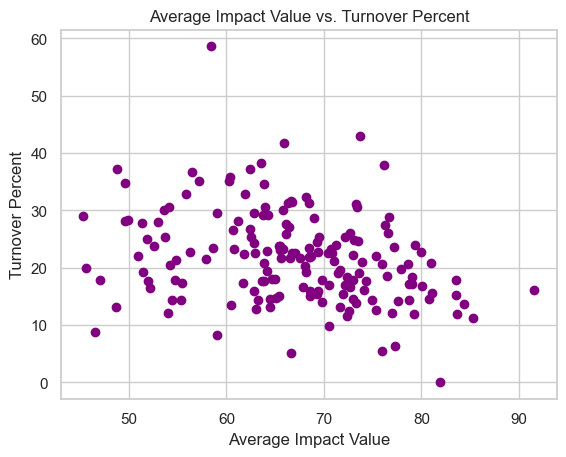

In [1667]:
plt.scatter(result_turnover_vs_satisfaction['average_impact_value'], result_turnover_vs_satisfaction['turnover_percent'], color='purple')
plt.title('Average Impact Value vs. Turnover Percent')
plt.xlabel('Average Impact Value')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined turnover percent with only the top10 and bottom10 districts from average impact value.

In [1668]:
query = """
SELECT 
    c.*,
    t."turnover_percent"
FROM combined c
JOIN turnover t
    ON c."district_number" = t."district_number"
WHERE t."school_name" = 'All Schools'
"""
result_turnover_vs_combined= pd.read_sql_query(query, conn)
result_turnover_vs_combined.head(20)

,district_number,district_name,average_impact_value,turnover_percent
0,5,Allen County,45.60,19.9
1,11,Anderson County,50.95,22.1
2,13,Augusta Independent,81.00,20.8
3,113,Caverna Independent,49.58,34.7
4,131,Clinton County,46.50,8.8
5,132,Cloverport Independent,45.33,29.0
6,146,Dawson Springs Independent,81.11,15.6
7,151,Edmonson County,80.78,14.5
8,246,Hazard Independent,91.58,16.1
9,272,Jackson Independent,83.67,12.0


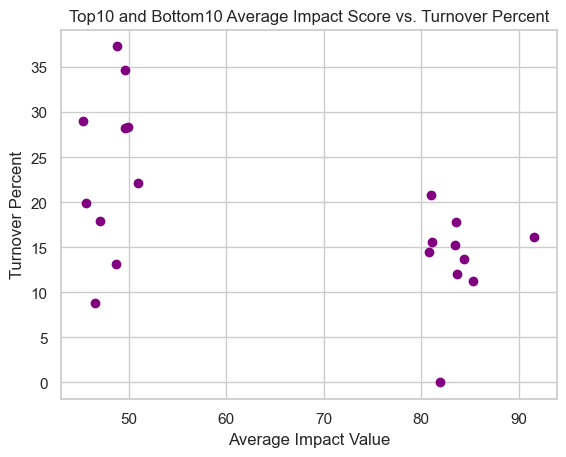

In [1669]:
plt.scatter(result_turnover_vs_combined['average_impact_value'], result_turnover_vs_combined['turnover_percent'], color='purple')
plt.title('Top10 and Bottom10 Average Impact Score vs. Turnover Percent')
plt.xlabel('Average Impact Value')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Added statsmodels library to perform four regression analyses with teacher turnover as the dependent variable and salary, school climate, school leadership, and managing student behavior as the independent variables. 

In [1670]:
X = result_turnover[['average_salary_23-24']]
y = result_turnover['turnover_percent']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       turnover_percent   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7892
Date:                Tue, 05 Aug 2025   Prob (F-statistic):              0.376
Time:                        20:44:00   Log-Likelihood:                -484.07
No. Observations:                 140   AIC:                             972.1
Df Residuals:                     138   BIC:                             978.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   29.6652 

In [1671]:
X = result_turnover_climate[['impact_value']]
y = result_turnover_climate['turnover_percent']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       turnover_percent   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     21.93
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           5.77e-06
Time:                        20:44:00   Log-Likelihood:                -590.76
No. Observations:                 172   AIC:                             1186.
Df Residuals:                     170   BIC:                             1192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.6725      3.650     10.596   

In [1672]:
X = result_turnover_leadership[['impact_value']]
y = result_turnover_leadership['turnover_percent']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       turnover_percent   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.521
Date:                Tue, 05 Aug 2025   Prob (F-statistic):             0.0349
Time:                        20:44:00   Log-Likelihood:                -598.94
No. Observations:                 172   AIC:                             1202.
Df Residuals:                     170   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.5643      4.168      7.333   

In [1673]:
X = result_turnover_behavior[['impact_value']]
y = result_turnover_behavior['turnover_percent']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       turnover_percent   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     21.25
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           7.88e-06
Time:                        20:44:00   Log-Likelihood:                -591.07
No. Observations:                 172   AIC:                             1186.
Df Residuals:                     170   BIC:                             1192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.4738      4.307      9.628   

Plotted the results of R-squared values of each analysis to show which independent variables had higher associations with teacher turnover. Salary was less than 1%, while school climate and managing student behavior were both around 11%. School leadership was 2.6%.

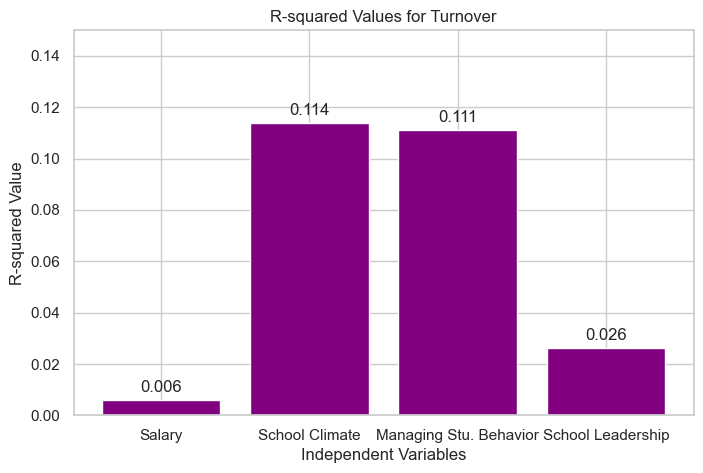

In [1674]:
variables = ['Salary', 'School Climate', 'Managing Stu. Behavior', 'School Leadership']
r_squared = [0.006, 0.114, 0.111, 0.026]
plt.figure(figsize=(8,5))
bars = plt.bar(variables, r_squared, color='purple')
plt.title('R-squared Values for Turnover')
plt.ylabel('R-squared Value')
plt.xlabel('Independent Variables')
plt.ylim(0,0.15)
for bar in bars: 
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.002, f'{height:.3f}', ha='center', va='bottom')
plt.show()

In [1675]:
conn.close()